In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
# Code to explore the sarcasm data set
# A value of 1 indicates that the article is sarcastic
# A value of 0 indicates that the article isn't sarcastic

df = pd.read_json('Z:\MIT FutureMakers\Week 2\Sarcasm_Data\Sarcasm_Headlines_Dataset_v2.json', lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [11]:
df.info

<bound method DataFrame.info of        is_sarcastic                                           headline  \
0                 1  thirtysomething scientists unveil doomsday clo...   
1                 0  dem rep. totally nails why congress is falling...   
2                 0  eat your veggies: 9 deliciously different recipes   
3                 1  inclement weather prevents liar from getting t...   
4                 1  mother comes pretty close to using word 'strea...   
...             ...                                                ...   
28614             1       jews to celebrate rosh hashasha or something   
28615             1  internal affairs investigator disappointed con...   
28616             0  the most beautiful acceptance speech this week...   
28617             1  mars probe destroyed by orbiting spielberg-gat...   
28618             1                 dad clarifies this not a food stop   

                                            article_link  
0      https://www.t

In [13]:
sentences = df['headline']
labels = df['is_sarcastic']

c:\users\jackt\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

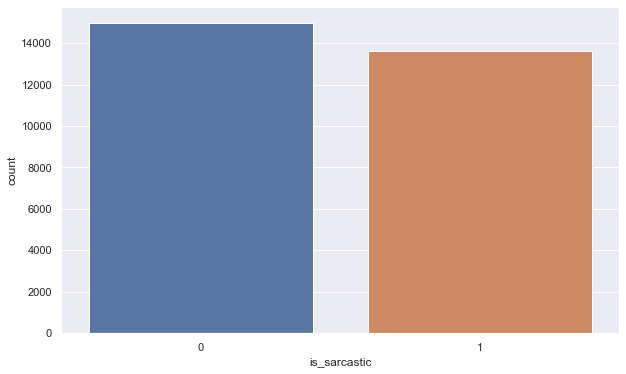

In [14]:
# Plots a 10x6 figure which counts the number of sarcastic articles
# and non-sarcastic articles in the dataset

plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(labels)

c:\users\jackt\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Sentence Lengths')]

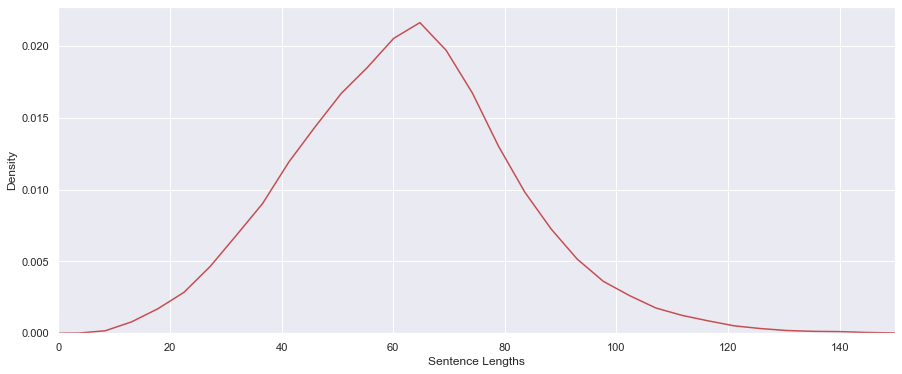

In [15]:
# Check sentence lengths
sentences_lengths = sentences.apply(lambda x: len(x))

plt.figure(figsize=(15,6))
plt.xlim(0, 150)

ax = sns.distplot(sentences_lengths, hist=False, color="r")
ax.set(xlabel='Sentence Lengths')

In [17]:
# Splits sentences and labels array into random training (train) and validation (test) subsets
# Total articles = 28618
# Validation data set = 28618*0.2 = 5724 articles

from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(sentences, labels, test_size=0.2, random_state=0)

print(train_sentences.shape)
print(val_sentences.shape)
print(train_labels.shape)
print(val_labels.shape)

(22895,)
(5724,)
(22895,)
(5724,)


In [18]:
# Tokenize and pad
vocab_size = 10000
oov_token = '<00V>'
max_length = 120
padding_type = 'post'
trunc_type = 'post'
embedding_dim = 16
num_epochs = 10

In [19]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [20]:
# Building the model

# Flatten = converting multidimensional array to 1D-array
# GlobalAveragePooling is used to better represent the vector by parsing the object
# and pooling the data via an average or max value

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(train_padded, 
                    train_labels, 
                    validation_data=(val_padded, val_labels), 
                    epochs=num_epochs, 
                    verbose=2)





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
716/716 - 1s - loss: 0.6698 - accuracy: 0.5878 - val_loss: 0.5705 - val_accuracy: 0.7979
Epoch 2/10
716/716 - 1s - loss: 0.4294 - accuracy: 0.8297 - val_loss: 0.3851 - val_accuracy: 0.8291
Epoch 3/10
716/716 - 1s - loss: 0.3199 - accurac

In [21]:
# Flattening

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model2.summary()
history_flatten = model2.fit(train_padded, 
                    train_labels, 
                    validation_data=(val_padded, val_labels), 
                    epochs=num_epochs, 
                    verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                46104     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 206,129
Trainable params: 206,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
716/716 - 1s - loss: 0.4900 - accuracy: 0.7332 - val_loss: 0.3225 - val_accuracy: 0.8587
Epoch 2/10
716/716 - 1s - loss: 0.2288 - accuracy: 0.9077 - val_loss: 0.3063 - val_accuracy: 0.8684
Epoch 3/10
716/716 - 1s - loss: 0.1429 - accur

In [23]:
# Long Short-Term Memory (LSTM)

model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model_lstm.summary()
history_lstm = model_lstm.fit(train_padded, 
                    train_labels, 
                    validation_data=(val_padded, val_labels), 
                    epochs=num_epochs, 
                    verbose=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense_4 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
716/716 - 33s - loss: 0.4000 - accuracy: 0.8146 - val_loss: 0.3139 - val_accuracy: 0.8625
Epoch 2/10
716/716 - 29s - loss: 0.2085 - accuracy: 0.9165 - val_loss: 0.3261 - val_accuracy: 0.8623
Epoch 3/10
716/716 - 29s - loss: 0.1272 - ac

In [24]:
# Multilayer LSTM

model_mul_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_mul_lstm.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model_mul_lstm.summary()
history_mul_lstm = model_mul_lstm.fit(train_padded, 
                    train_labels, 
                    validation_data=(val_padded, val_labels), 
                    epochs=num_epochs, 
                    verbose=2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 120, 128)          41472     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 244,273
Trainable params: 244,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
716/716 - 70s - loss: 0.3966 - accuracy: 0.8108 - val_loss: 0.3231 - val_accuracy: 0.8599
Epoch 2/10
71

In [ ]:
# Reference: https://www.kaggle.com/mertyldrr/stacked-lstm-tensorflow-2-beginner 